## <i> <span style='color:red'>DECISION TREE:COMPANY DATA</i></span>

### PROBLEM STATMENT:A cloth manufacturing company is interested to know about the segment or attributes which causes high sale.Use Decision tree classifier and Decision tree regressor to achieve the objective

In [1]:
# Import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets  
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import metrics 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the  csv file
company=pd.read_csv("Company_Data.csv")
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
# Checking basic informations from the dataset
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [4]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
company[company.duplicated(keep = False)]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US


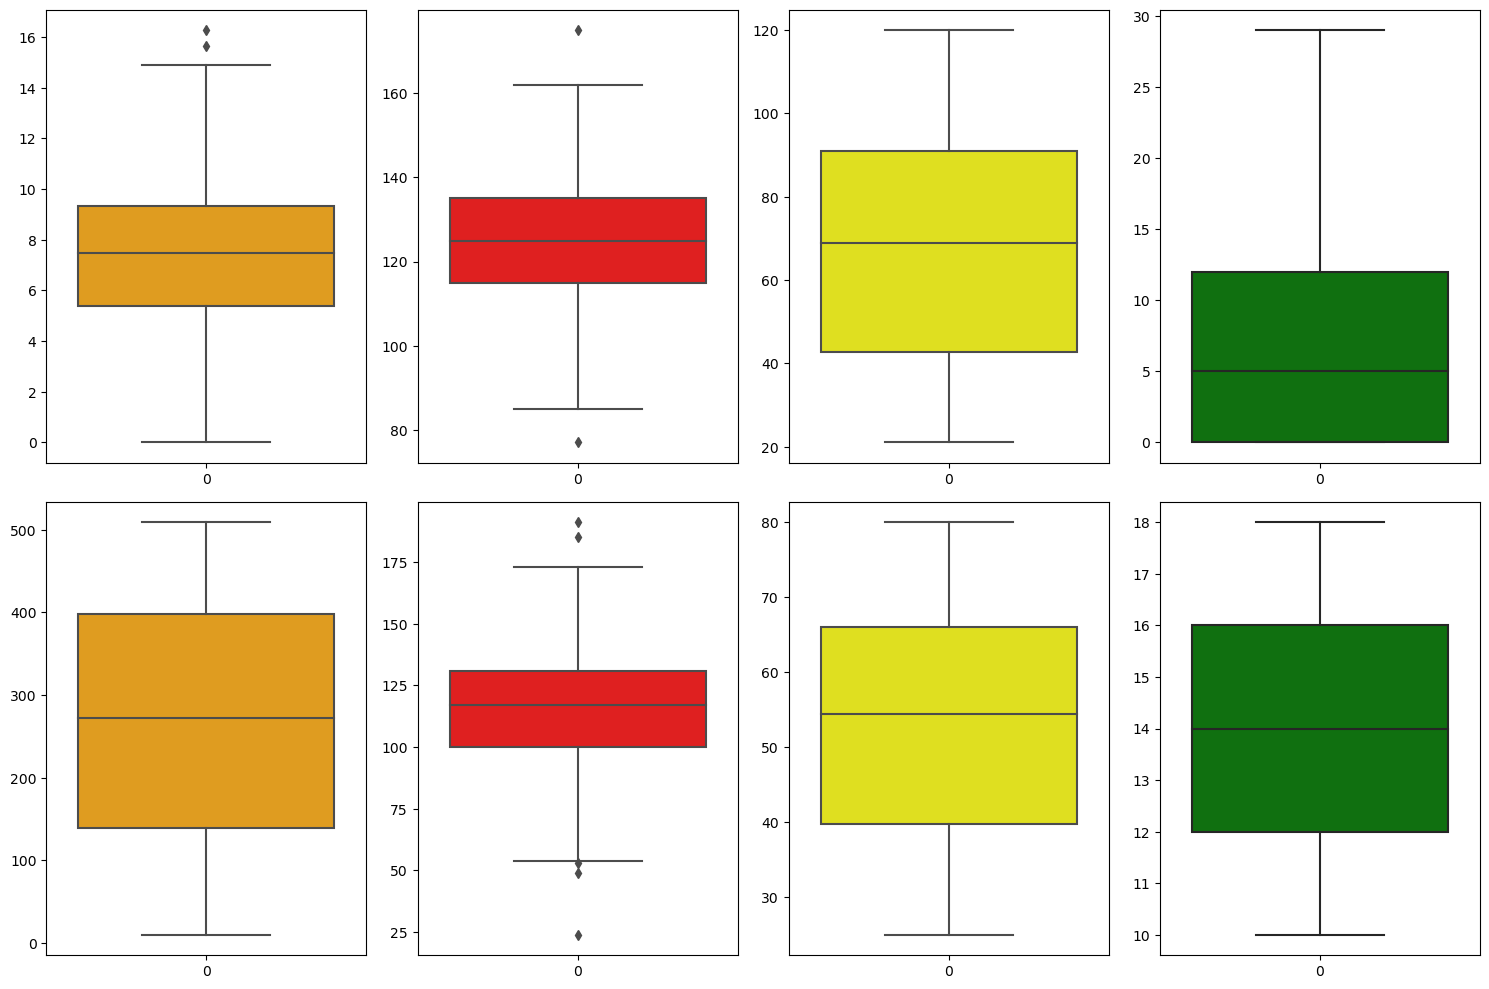

In [6]:
# Checking for the outliers using boxplot
fig, ax = plt.subplots(2,4, figsize=(15,10))
sns.boxplot(company.Sales, ax=ax[0,0],color='orange')
sns.boxplot(company.CompPrice, ax=ax[0,1],color='red')
sns.boxplot(company.Income, ax=ax[0,2],color='yellow')
sns.boxplot(company.Advertising, ax=ax[0,3],color='green')
sns.boxplot(company.Population, ax=ax[1,0],color='orange')
sns.boxplot(company.Price, ax=ax[1,1],color='red')
sns.boxplot(company.Age, ax=ax[1,2],color='yellow')
sns.boxplot(company.Education, ax=ax[1,3],color='green')

plt.tight_layout()
plt.show()

In [7]:
# Find the average sales and classifying the categories that are greater than the average sales value, as the fast moving product segment
company["sales"]=(company["Sales"]>7.49)*1

In [8]:
#  Label encoding for categorical values
label_encoder = preprocessing.LabelEncoder()
company['ShelveLoc']= label_encoder.fit_transform(company['ShelveLoc']) 
company['Urban']= label_encoder.fit_transform(company['Urban']) 
company['US']= label_encoder.fit_transform(company['US']) 

In [9]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1,0
4,4.15,141,64,3,340,128,0,38,13,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1,0
397,7.41,162,26,12,368,159,2,40,18,1,1,0
398,5.94,100,79,7,284,95,0,50,12,1,1,0


In [10]:
# Splitting the data into dependent and independent 
x=company.iloc[:,0:10]
y=company.iloc[:,10]

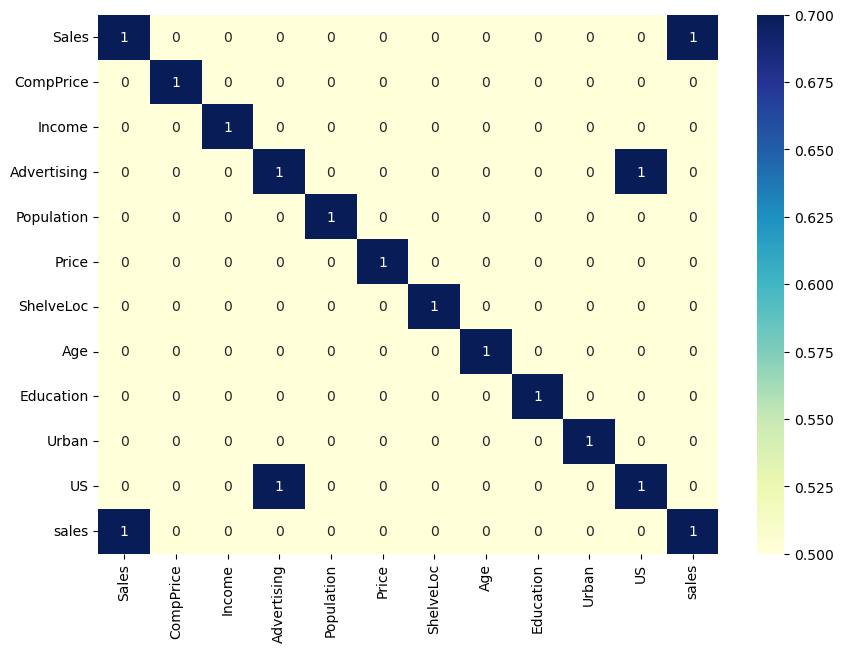

In [11]:
# Heatmap- To check the correlation
plt.figure(figsize=(10,7))
sns.heatmap(company.corr()>0.6, annot = True,cmap="YlGnBu",vmin=0.5, vmax=0.7)
plt.show()

<Axes: >

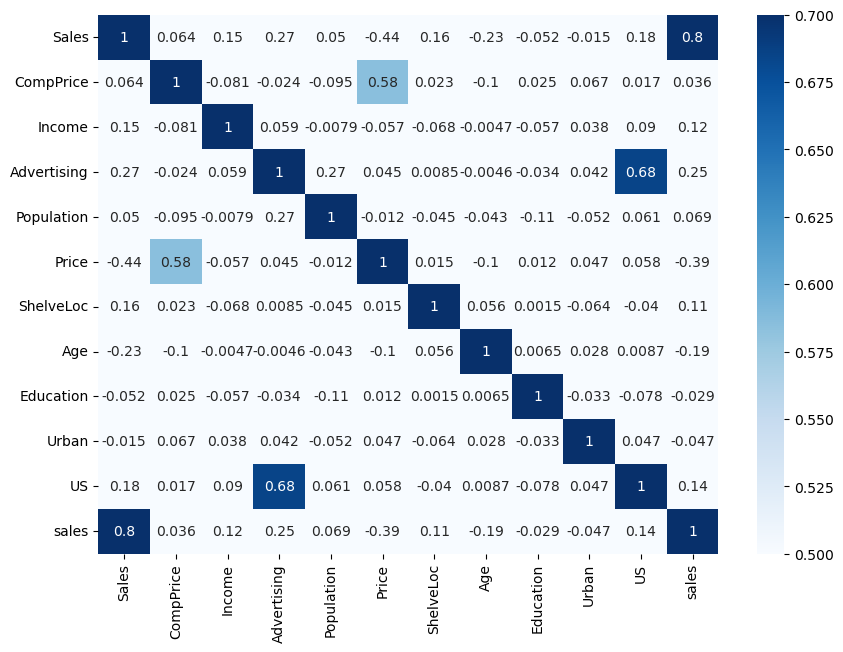

In [12]:
# Correlation matrix
plt.figure(figsize=(10,7))
sns.heatmap(company.corr(),cmap="Blues",annot=True,vmin=0.5, vmax=0.7)

In [13]:
# Splitting data  for training and testing
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=20)

In [14]:
# Decision tree classifier with maximum depth as 3 and fitting the model
model = DecisionTreeClassifier(criterion = 'gini',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

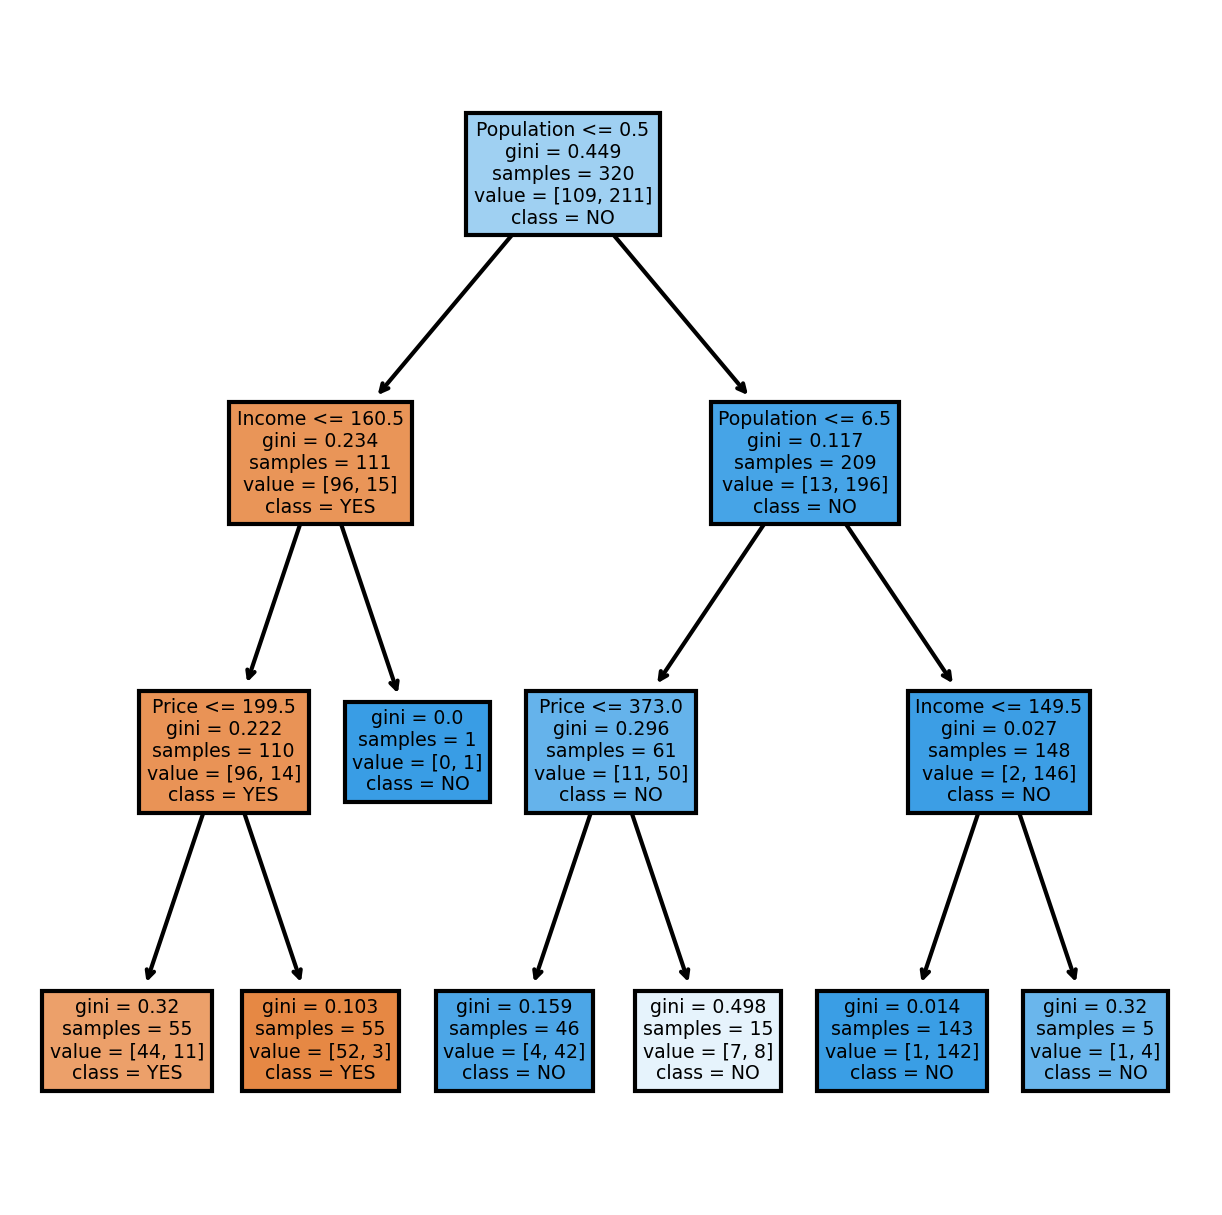

In [15]:
# Visualization for decision tree
fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US','income']
cn=['YES','NO']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True); 

In [16]:
#checking the score¶
model.score(x_train, y_train)

0.915625

In [17]:
# Predicting with test data 
preds = model.predict(x_test)

In [18]:
# Checking the accuracy with predicted and tested
np.mean(preds==y_test)

0.9

In [19]:
#Checking the model score
model.score(x_test, y_test)

0.9

In [20]:
model.feature_importances_

array([0.        , 0.01830811, 0.        , 0.93835396, 0.04333793,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [21]:
y_pred = preds
('Accuracy Score:',metrics.accuracy_score(y_test,y_pred))

('Accuracy Score:', 0.9)

In [22]:
# Prediction with probabilities of the classes
model.predict_proba(x_test)

array([[0.00699301, 0.99300699],
       [0.00699301, 0.99300699],
       [0.00699301, 0.99300699],
       [0.46666667, 0.53333333],
       [0.8       , 0.2       ],
       [0.2       , 0.8       ],
       [0.8       , 0.2       ],
       [0.8       , 0.2       ],
       [0.8       , 0.2       ],
       [0.00699301, 0.99300699],
       [0.00699301, 0.99300699],
       [0.00699301, 0.99300699],
       [0.00699301, 0.99300699],
       [0.08695652, 0.91304348],
       [0.8       , 0.2       ],
       [0.94545455, 0.05454545],
       [0.94545455, 0.05454545],
       [0.00699301, 0.99300699],
       [0.8       , 0.2       ],
       [0.94545455, 0.05454545],
       [0.8       , 0.2       ],
       [0.94545455, 0.05454545],
       [0.00699301, 0.99300699],
       [0.8       , 0.2       ],
       [0.00699301, 0.99300699],
       [0.00699301, 0.99300699],
       [0.8       , 0.2       ],
       [0.00699301, 0.99300699],
       [0.8       , 0.2       ],
       [0.00699301, 0.99300699],
       [0.

In [23]:
# Confusion matrix
cm= confusion_matrix(y_test, y_pred) 
cm

array([[29,  4],
       [ 4, 43]], dtype=int64)

Text(0.5, 1.0, 'Accuracy Score: 0.9')

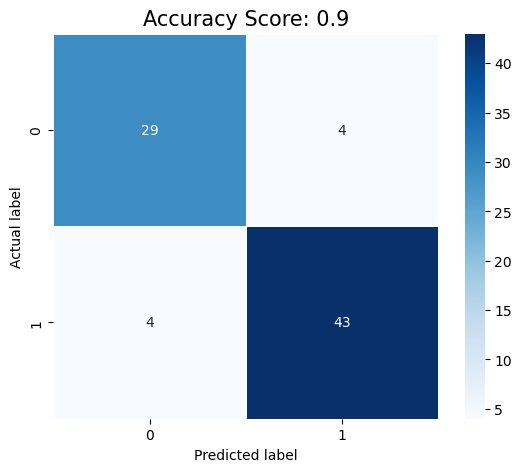

In [24]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,cmap="Blues")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(model.score(x_test, y_test))
plt.title(all_sample_title, size = 15)

In [25]:
#Classification report - Y_test data and the predicted data¶
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.88      0.88      0.88        33
           1       0.91      0.91      0.91        47

    accuracy                           0.90        80
   macro avg       0.90      0.90      0.90        80
weighted avg       0.90      0.90      0.90        80



In [26]:
# Creating a for loop to identify the train and test accuracies of the prediction, with the change in the max_depth feature of the decision tree classifier from 1 to 11
train_accuracy = []
test_accuracy = []
for max_depth in range(1,11):
    model = DecisionTreeClassifier(criterion='entropy', max_depth= max_depth, random_state= 40)
    model.fit(x_train, y_train)
    train_accuracy.append(model.score(x_train, y_train))
    test_accuracy.append(model.score(x_test, y_test))

In [27]:
# Finding the accuracies in different maximum depth in training and testing data
accuracies = pd.DataFrame({'max_depth':range(1,11),'train_acc':train_accuracy, 'test_acc':test_accuracy})
accuracies

,max_depth,train_acc,test_acc
0,1,0.912500,0.9000
1,2,0.912500,0.9000
2,3,0.912500,0.9000
3,4,0.925000,0.8750
4,5,0.946875,0.8500
5,6,0.956250,0.8875
6,7,0.971875,0.8875
7,8,0.975000,0.8750
8,9,0.978125,0.8750
9,10,0.984375,0.8875


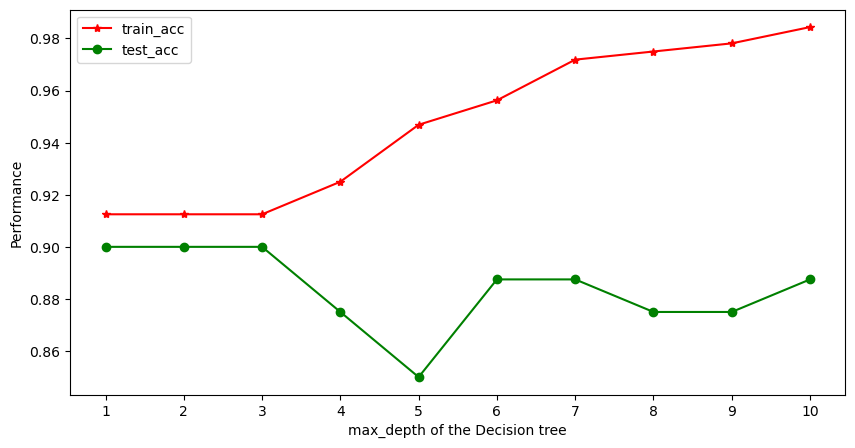

In [28]:
# Visualization 
labels =['train_acc','test_acc']
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot()
plt.plot(accuracies['max_depth'],accuracies['train_acc'],color='red', marker = '*')
plt.plot(accuracies['max_depth'], accuracies['test_acc'],color='green' ,marker = 'o')
ax.set_xticks(np.arange(1,11))
plt.legend(labels)
plt.xlabel('max_depth of the Decision tree')
plt.ylabel('Performance')
plt.show()

In [29]:
# Decision tree regressor
array = company.values
X = array[:,0:10]
y = array[:,10]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=40)

In [31]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [32]:
# Identifying the accuracy of the test data
model.score(X_test,y_test)

0.06720647773279353

## Inference:
### The decision tree classification give  good accuracies based on the maximum depth.When the maximum depth of the decision tree  is 9, the accuracy of the classsification algorithm gives 88.75%. And also we can see that decision tree regression is not an advisible method for classifying the salary data. The accuracy value is very low.
